# **Casos de Uso**
## Grupo 3
## Módulo: Fundamentos de Python

# <font color='blue'>__Caso de uso : Yisella Carrasco__</font>
## ***Caracterización población extranjera en Chile, Región de antofagasta, año 2022***

En el análisis ecónomico usamos constantemente bases de datos para generar información que aporte a la toma de decisiones para el sector público y privado. En este sentido, en los últimos años ha estado sobre la mesa del debate la caracterización de la población extranjera en nuestro país. Utilizaré una base de datos pública para realizar una primera aproximación al conocimiento de la población extranjera en Antofagasta para el año 2022.

In [ ]:
# Importar pandas
import pandas as pd

#Se monta el drive en colab y llama la base
from google.colab import drive
drive.mount('/content/drive')
BASE_2022 = '/content/drive/MyDrive/base-2022-comunas.csv'

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(BASE_2022, encoding='ISO-8859-1')

Mounted at /content/drive


In [ ]:
#información sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123986 entries, 0 to 123985
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            123986 non-null  object 
 1   EDAD            123986 non-null  object 
 2   PAIS            123986 non-null  object 
 3   AÑO ESTIMACION  123986 non-null  int64  
 4   REGION          120391 non-null  object 
 5   COMUNA          123986 non-null  object 
 6   CENSO AJUSTADO  113813 non-null  float64
 7   RRAA_REGULAR    74611 non-null   float64
 8   RRAA_IRREGULAR  20375 non-null   float64
 9   RRAA_TOTAL      76931 non-null   float64
 10  ESTIMACION      123986 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 10.4+ MB


In [ ]:
#Los datos importados contienen 11 columnas de información, ya que quiero hacer un
#análisis por región eliminaré las columnas que no contengan esta información
# Eliminar las filas donde la columna REGION tenga valores nulos o vacíos
df = df.dropna(subset=['REGION', 'ESTIMACION'])
#también eliminaré las que tienen "región ignorada" (AGREGUÉ ESTE PUNTO DESPUES DE UN ANÁLISIS DONDE VI QUE ESTA CATEGORÍA EXISTÍA)
df = df[df['REGION'] != 'REGIÓN IGNORADA']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117181 entries, 1 to 123985
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            117181 non-null  object 
 1   EDAD            117181 non-null  object 
 2   PAIS            117181 non-null  object 
 3   AÑO ESTIMACION  117181 non-null  int64  
 4   REGION          117181 non-null  object 
 5   COMUNA          117181 non-null  object 
 6   CENSO AJUSTADO  110303 non-null  float64
 7   RRAA_REGULAR    68529 non-null   float64
 8   RRAA_IRREGULAR  16355 non-null   float64
 9   RRAA_TOTAL      70479 non-null   float64
 10  ESTIMACION      117181 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 10.7+ MB


In [ ]:
display(df.head(10))

,SEXO,EDAD,PAIS,AÑO ESTIMACION,REGION,COMUNA,CENSO AJUSTADO,RRAA_REGULAR,RRAA_IRREGULAR,RRAA_TOTAL,ESTIMACION
1,H,00 A 04,ALEMANIA,2018,COQUIMBO,LA SERENA,2.0,NaN,NaN,NaN,2
2,H,00 A 04,ALEMANIA,2018,MAULE,CURICÓ,1.0,NaN,NaN,NaN,1
3,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,ESTACIÓN CENTRAL,1.0,NaN,NaN,NaN,1
4,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,LAS CONDES,3.0,NaN,NaN,NaN,3
5,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,LO BARNECHEA,3.0,NaN,NaN,NaN,3
6,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,PEÑALOLÉN,1.0,NaN,NaN,NaN,1
7,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,PROVIDENCIA,3.0,NaN,NaN,NaN,3
8,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,SAN JOAQUÍN,1.0,NaN,NaN,NaN,1
9,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,SANTIAGO,2.0,NaN,NaN,NaN,2
10,H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,VITACURA,6.0,NaN,NaN,NaN,6


In [ ]:
# Agrupación de la suma de ESTIMACION por AÑO ESTIMACION y REGION
print('Suma de estimación agrupada por año y región:')
agrupacion = df.groupby(by=['AÑO ESTIMACION', 'REGION'])['ESTIMACION'].sum().sort_values(ascending=False)
display(agrupacion)

Suma de estimación agrupada por año y región:


,,ESTIMACION
AÑO ESTIMACION,REGION,
2022,METROPOLITANA DE SANTIAGO,820124
2021,METROPOLITANA DE SANTIAGO,812960
2020,METROPOLITANA DE SANTIAGO,798868
2019,METROPOLITANA DE SANTIAGO,749237
2018,METROPOLITANA DE SANTIAGO,650266
2022,ANTOFAGASTA,98730
2021,ANTOFAGASTA,95357
2020,ANTOFAGASTA,91566
2019,ANTOFAGASTA,87554


DURANTE LOS ÚLTIMOS 5 AÑOS LAS REGIONES CON MAYOR NÚMERO DE EXTRANJEROS SON LA REGIÓN METROPOLITANA, ANTOFAGASTA E IQUIQUE, RESPECTIVAMENTE. EN ESTAS REGIONES LAS CIFRAS HAN IDO AUMENTANDO AÑO A AÑO, SIN EXCEPCIÓN DE LOS AÑOS DE PANDEMIA.

In [ ]:
# Agrupación de la suma de ESTIMACION por AÑO ESTIMACION y REGION
print('Suma de ESTIMACION agrupada por AÑO_ESTIMACION y REGION (solo para 2022):')
agrupacion = df.groupby(by=['AÑO ESTIMACION', 'REGION'])['ESTIMACION'].sum()

# Filtrar solo los datos del año 2022 y ordenar de mayor a menor
agrupacion_2022 = agrupacion[agrupacion.index.get_level_values('AÑO ESTIMACION') == 2022].sort_values(ascending=False)

display(agrupacion_2022)
print()

Suma de ESTIMACION agrupada por AÑO_ESTIMACION y REGION (solo para 2022):


AÑO ESTIMACION  REGION                               
2022            METROPOLITANA DE SANTIAGO                820124
                ANTOFAGASTA                               98730
                TARAPACÁ                                  67054
                VALPARAÍSO                                36306
                ARICA Y PARINACOTA                        30436
                MAULE                                     27069
                COQUIMBO                                  25897
                LIBERTADOR GENERAL BERNARDO O'HIGGINS     17313
                ATACAMA                                   14791
                BIOBÍO                                    14478
                LOS LAGOS                                 13935
                LA ARAUCANÍA                              11093
Name: ESTIMACION, dtype: int64

TAMBIÉN PODEMOS VER UN RESUMEN DEL AÑO 2022 POR REGIÓN, DONDE ANTOFAGASTA RECIBIÓ 98.730 PERSONAS EXTRANJERAS. ¿DE QUÉ NACIONALIDAD SON?

In [ ]:
# Filtrar el DataFrame para la región de Antofagasta en el año 2022
df_antofagasta_2022 = df[(df['REGION'] == 'ANTOFAGASTA') & (df['AÑO ESTIMACION'] == 2022)]

# Agrupar por PAIS y SEXO, y sumar la ESTIMACION
df_grouped = df_antofagasta_2022.groupby(['PAIS', 'SEXO'])['ESTIMACION'].sum().reset_index()

# Pivotar la tabla para separar los valores de SEXO en columnas
df_pivot = df_grouped.pivot_table(index='PAIS', columns='SEXO', values='ESTIMACION', aggfunc='sum', fill_value=0)

# Ordenar de mayor a menor por la suma total de ESTIMACION (se suman los valores por país)
df_pivot['Total'] = df_pivot.sum(axis=1)
df_sorted = df_pivot.sort_values(by='Total', ascending=False)

# Mostrar el DataFrame resultante
display(df_sorted)

SEXO,H,M,Total
PAIS,,,
BOLIVIA,15943,19491,35434
COLOMBIA,14887,16120,31007
PERÚ,6760,7269,14029
VENEZUELA,4466,4497,8963
ECUADOR,1093,1166,2259
ARGENTINA,1067,1129,2196
OTRO PAÍS,501,391,892
PARAGUAY,314,512,826
BRASIL,222,301,523


PODEMOS VER QUE EN ANTOFAGASTA LA MAYORÍA DE PERSONAS EXTRANJERAS SON DE BOLIVIA, LO CUAL PUEDE ESTAR EXPLICADA POR NUESTROS PUNTOS FRONTERIZOS, SEGUIDO DE COLOMBIA Y PERÚ Y, EN MENOR MEDIDA, VENEZUELA. EN CADA CASO MENCIONADO ES MAYOR EL NÚMERO DE MUJERES QUE DE HOMBRES DE LA NACIONALIDAD.

# <font color='blue'>__Caso de uso : Raúl Muñoz__</font>
## ***Medidas de tendencia central para muestreo biológico***

En el área de calidad para la pesca industrial, se miden parámetros como talla, peso e integridad de diversas especies. Para gestionar esta informacion de manera eficiente, se utiliza un sistema que permite registrar y analizar los muestreos de estas especies.

- **Carga de Datos:** El proceso comienza con la carga masiva de un archivo csv que contiene datos sobre diferentes especies, incluyendo su nombre, talla, peso, porcentaje de integridad, el tipo de flota, la planta de procesamiento (1,2,3) y la fecha de análisis.
- **Registro de Muestreos:** El sistema analiza el archivo y registra cada muestreo, agrupando los datos por especie. Si encuentra una especie nueva, se crea una entrada específica para ella.
- **Análisis de Datos:** El sistema calcula y muestra métricas clave para la especie seleccionada, tales como peso medio, mediana, moda, talla promedio, mediana y moda. También se despliegan todos los muestreos registrados por especie.


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo CSV en Google Drive
archivo_csv = '/content/drive/MyDrive/BITACORA - Grupo 3/01 FUNDAMENTOS DE PYTHON/assets/caso_uso_raul/muestreos.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Mostrar las primeras filas del DataFrame para verificar los datos cargados
display(df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,nombre,talla,peso,integridad,flota,planta,fecha_analisis
0,ANCHOVETA,9,5.2,100,INDUSTRIAL,3,2024-08-15
1,ANCHOVETA,14,5.2,100,ARTESANAL,2,2024-01-19
2,SARDINA,20,7.7,100,ARTESANAL,3,2024-02-15
3,BONITO,8,9.9,41,INDUSTRIAL,1,2024-04-26
4,JUREL,8,10.7,100,INDUSTRIAL,2,2024-02-26
5,JUREL,11,10.7,100,ARTESANAL,2,2024-02-19
6,ANCHOVETA,10,6.9,100,INDUSTRIAL,1,2024-03-24
7,BONITO,8,5.1,100,ARTESANAL,3,2024-02-05
8,JUREL,18,8.3,100,ARTESANAL,2,2024-03-10
9,ANCHOVETA,8,4.0,100,INDUSTRIAL,1,2024-01-20


In [ ]:

# Convertir la fecha a formato datetime para análisis temporal
df["fecha_analisis"] = pd.to_datetime(df["fecha_analisis"])

# 1. Estadísticas generales: promedio, mediana y moda de peso y talla
estadisticas_generales = {
    "peso_promedio": df["peso"].mean(),
    "peso_mediana": df["peso"].median(),
    "peso_moda": df["peso"].mode().iloc[0],
    "talla_promedio": df["talla"].mean(),
    "talla_mediana": df["talla"].median(),
    "talla_moda": df["talla"].mode().iloc[0],
}
# Mostrar Estadisticas
print("Estadisticas Generales: ")
display(estadisticas_generales)

# 2. Análisis por flota
flota_estadisticas = df.groupby("flota")[["peso", "talla"]].mean()
print("\n Análisis de Peso y Talla por flota: ")
display(flota_estadisticas)

# 3. Análisis por planta: moda de las tallas
planta_moda_talla = df.groupby("planta")["talla"].agg(lambda x: x.mode().iloc[0])

# Mostrar la moda de las tallas por planta
print("\nModa de las tallas por planta: ")
print(planta_moda_talla)

# 4. Distribución temporal: promedio y mediana de integridad por mes
#Pasar a mes
df["mes"] = df["fecha_analisis"].dt.month
integridad_por_mes = df.groupby("mes")[["peso","talla"]].agg(["mean", "median"])

print("\n Promedio, Mediana del Peso y Talla por mes")
display(integridad_por_mes)




Estadisticas Generales: 


{'peso_promedio': 7.3374,
 'peso_mediana': 7.2,
 'peso_moda': 11.3,
 'talla_promedio': 13.901,
 'talla_mediana': 14.0,
 'talla_moda': 15}


 Análisis de Peso y Talla por flota: 


,peso,talla
flota,,
ARTESANAL,7.218199,13.915709
INDUSTRIAL,7.467573,13.884937



Moda de las tallas por planta: 
planta
1    12
2    11
3    15
Name: talla, dtype: int64

 Promedio, Mediana del Peso y Talla por mes


peso             talla       
         mean median       mean median
mes                                   
1    7.401770   7.50  13.769912   13.0
2    7.360638   7.15  14.319149   14.5
3    7.385714   7.00  13.848739   14.0
4    7.383036   7.20  14.044643   14.0
5    7.409804   7.15  13.754902   14.0
6    7.588571   7.90  13.066667   13.0
7    7.292157   7.00  13.647059   14.0
8    7.175207   7.30  14.305785   15.0
9    7.111364   6.95  14.242424   15.0

In [ ]:
# Tabla dinámica (pivot table) para analizar talla promedio por mes, especie y flota
pivot_table_tallas = pd.pivot_table(
    df,
    values="talla",
    index=["mes", "nombre"],  # Filas: Mes y especie
    columns="flota",         # Columnas: Tipo de flota
    aggfunc="mean",          # Función de agregación: Promedio
    fill_value=0             # Rellenar valores faltantes con 0
)


pivot_table_tallas.head(100)


flota          ARTESANAL  INDUSTRIAL
mes nombre                          
1   ANCHOVETA  14.200000   13.181818
    BONITO     14.625000   12.272727
    CABALLA    13.307692   12.900000
    JUREL      14.666667   14.266667
    SARDINA    14.769231   13.300000
2   ANCHOVETA  14.090909   14.333333
    BONITO     14.000000   13.750000
    CABALLA    14.454545   14.000000
    JUREL      15.000000   15.300000
    SARDINA    14.600000   13.555556
3   ANCHOVETA  14.000000   13.375000
    BONITO     13.272727   14.142857
    CABALLA    14.076923   14.687500
    JUREL      13.941176   13.818182
    SARDINA    12.666667   14.285714
4   ANCHOVETA  13.833333   13.333333
    BONITO     14.000000   14.181818
    CABALLA    14.181818   14.300000
    JUREL      14.000000   14.750000
    SARDINA    15.769231   12.000000
5   ANCHOVETA  14.818182   12.500000
    BONITO     12.500000   11.833333
    CABALLA    13.300000   15.666667
    JUREL      14.214286   14.000000
    SARDINA    14.666667   13.384615
6   ANCHOVETA  12.700000   15.571429
    BONITO     14.100000   12.714286
    CABALLA    11.500000   12.700000
    JUREL      12.600000   13.750000
    SARDINA    13.400000   13.222222
7   ANCHOVETA  12.769231   14.000000
    BONITO     13.500000   16.500000
    CABALLA    12.615385   13.375000
    JUREL      13.818182   14.125000
    SARDINA    13.857143   13.117647
8   ANCHOVETA  15.916667   15.900000
    BONITO     13.083333   14.266667
    CABALLA    14.700000   12.625000
    JUREL      15.571429   13.800000
    SARDINA    14.692308   12.666667
9   ANCHOVETA  13.571429   15.875000
    BONITO     15.066667   12.700000
    CABALLA    12.588235   14.450000
    JUREL      14.000000   16.285714
    SARDINA    13.928571   14.500000



```
# This is formatted as code
```

# <font color='blue'>**Caso de uso: Hugo Tapia**</font>

## ***Proceso ETL para cálculo de garantías en mercado eléctrico***

Para garantizar el cumplimiento de la cadena de pagos en el mercado mayorista de energía, el Coordinador Eléctrico debe calcular y solicitar garantías a las empresas generadoras.

Para ello se efectúa una modelación y proyección de la operación del sistema eléctrico para el año inmediatamente siguiente, determinando para cada empresa la diferencia entre inyecciones y retiros, correspondiente tanto a cada Unidad Generadora, como a Clientes Finales y Contratos de Compraventa Físicos de Energía, según corresponda, valorizados al costo marginal promedio horario resultante de la proyección para cada periodo de facturación del año siguiente.

El monto de la garantía se determinará, como la suma de los tres meses del escenario hidrológico en que la empresa se encuentre con mayor déficit coincidente entre la valorización a costo marginal promedio mensual de su generación y los retiros esperados destinados a abastecer a sus contratos de suministro incluidos los contratos de compraventa antes señalados.

Para construir el perfil horario de cada cliente para el año 2025, se utiliza como insumo el comportamiento real de cada cliente en el período comprendido entre julio de 2023 y junio de 2024. A partir de esta información, se crean perfiles por hora, mes y día-tipo para cada una de las claves existentes en la base de datos utilizada.

Los retiros se clasifican en 3 Tipos de Cliente, el cual puede ser Regulado (R), Libre (L) y Libre en zona de Distribución (L_D).

Los perfiles para cada uno de los retiros se calculan según lo siguiente:

Perfil Retiro A_(M,H,DT)=(Promedio_Medida IVT A_(M,H,DT) ) ̅

Donde:

*   Perfil Retiro_(M,H,DT): Corresponde al perfil del retiro A,para cada mes M, hora H y día tipo DT.
*   (Promedio_Medida IVT_(M,H,DT) ) ̅: Corresponde al promedio de las medidas IVTE para el retiro A, considerando todas las horas H del mes M y todos los días tipo DT que se encuentren en la base de datos IVTE.
* 	M: Corresponde al mes que adopta valores entre 1 (enero) y 12 (diciembre).
*   H: Corresponde a la hora del día, la que comprende desde la Hora1 a la hora 24 (00:00 a 24:00 hrs.).
* 	DT: Corresponde al día tipo, el cual corresponde a LU (lunes), TR (martes a viernes), SA (sábado) y DO (domingos y festivos).

Sin embargo, al trabajar con la información histórica de 12 meses, es muy frecuente que presente meses sin información por problemas en los sistemas de medidas. Esta falta de completitud debe ser subsanada, y una buena medida de reparación es considerar el promedio de los valores que sí se encuentran disponibles, para esa misma clave, día-tipo y hora, pero de los meses que sí tengan datos.

A continuación se muestra un ejemplo de una clave (3449023_PEAJE
) a la que sólo hay datos para los meses de ABR, JUN y MAY.

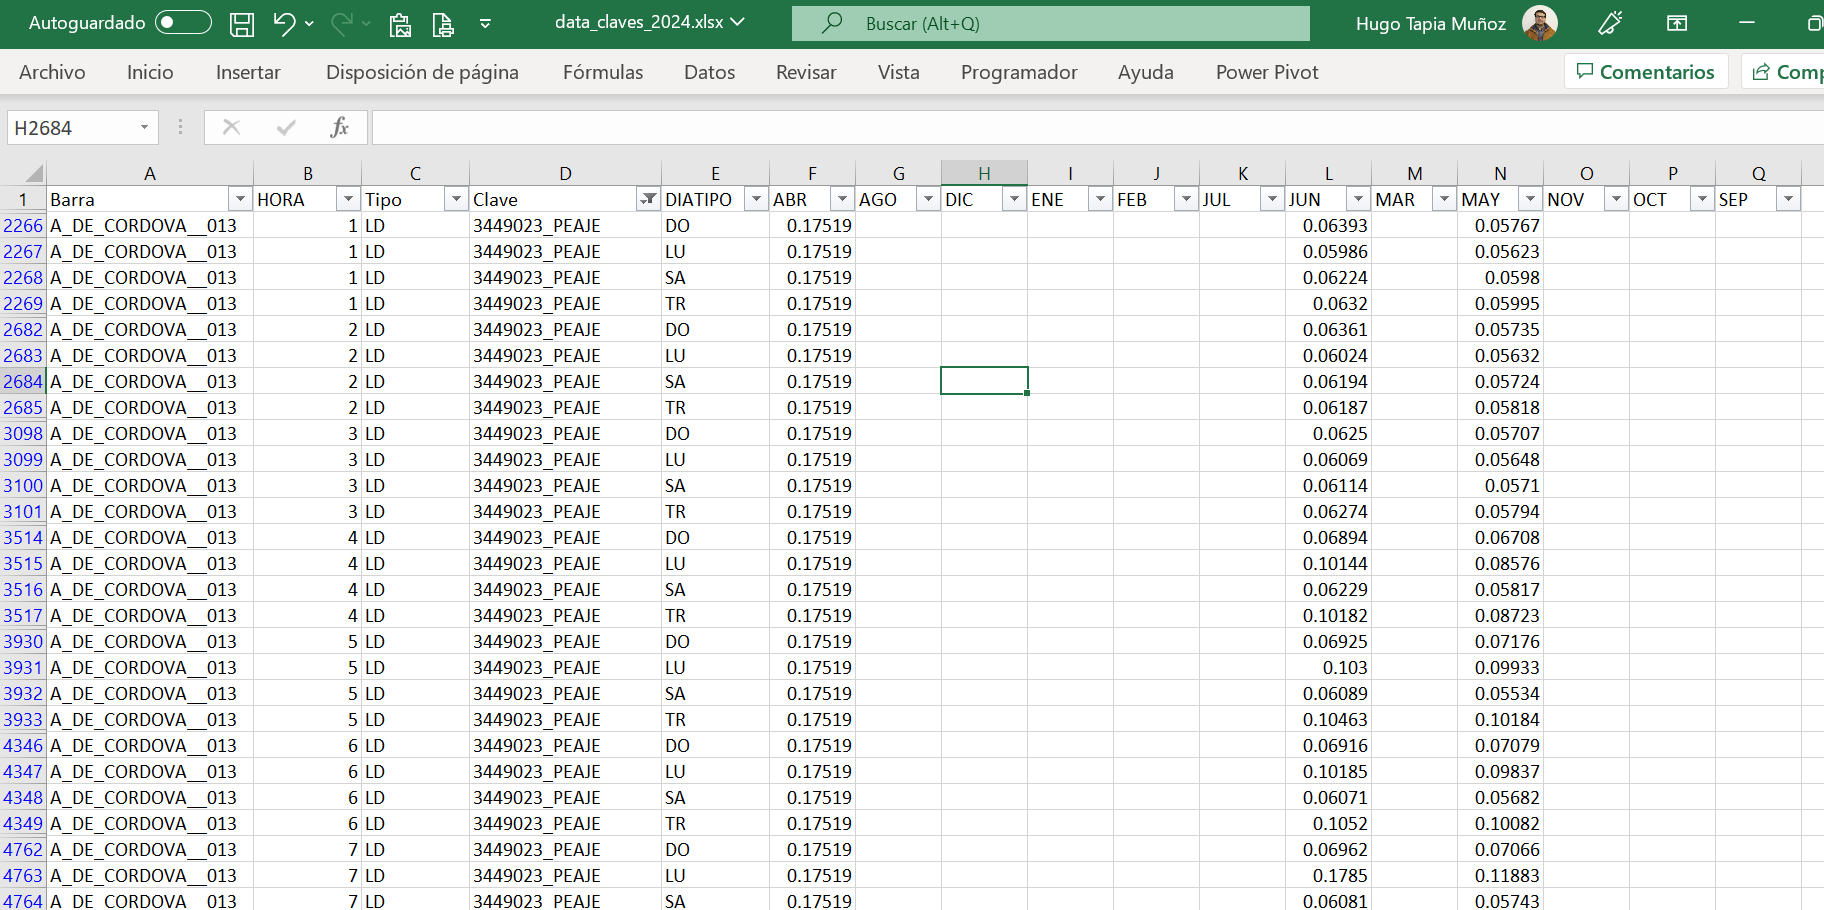




Tradicionalmente este problema se ha manejado con planillas excel muy pesadas y riesgosas por la cantidad de fórmulas.

A partir de los conocimiento adquiridos en el módulo, desarrolle la siguiente rutina python que permite detectar los valores NaN, y reemplazarlos por el promedio de los meses que sí tienen datos.

```python
import pandas as pd
import time

# Comenzar a medir el tiempo de ejecución
start_time = time.time()

# Cargar el archivo Excel en un DataFrame
file_path = 'data_claves_2024.xlsx'
data = pd.read_excel(file_path)

data.info()

# Definir las columnas de interés para la región de Abril a Junio
columnas_mes = ['ABR',	'AGO',	'DIC',	'ENE',	'FEB', 'JUL',	'JUN',	'MAR',	'MAY',	'NOV',	'OCT',	'SEP']

# Calcular el promedio de las columnas para cada fila
promedio_clave_hora = data[columnas_mes].mean(axis=1)

# Reemplazar los NaN con el promedio de estas columnas para cada fila
data[columnas_mes] = data[columnas_mes].apply(lambda x: x.fillna(promedio_clave_hora))

# Calcular el tiempo de ejecución finalizado
end_time = time.time()
elapsed_time = end_time - start_time

# Mostrar el DataFrame resultante y el tiempo de ejecución
print(data.head(10))
data.info()
print()
print(f"Tiempo de ejecución: {elapsed_time} segundos")

# Exportar el DataFrame modificado a un nuevo archivo Excel
output_path = 'Data_Claves_2024_rev.xlsx'
data.to_excel(output_path, index=False)

print(f"Data exportada exitosamente al archivo: {output_path}")

```

Esta rutina ejecuta los siguientes pasos:

*   Lee archivo de entrada con información histórica (data_claves_2024.xlsx), y lo carga en un dataframe.
*   Entrega un reporte (info()) que permite detectar el tipo y número de elementos de cada columna. En este caso el reporte indicó que las columnas completas tienen 480744 registros, pero todas las columnas que contien data mensual (ENE-FEB... NOV-DIC) tienen menos elementos, por lo que se encuentran imcompletas:

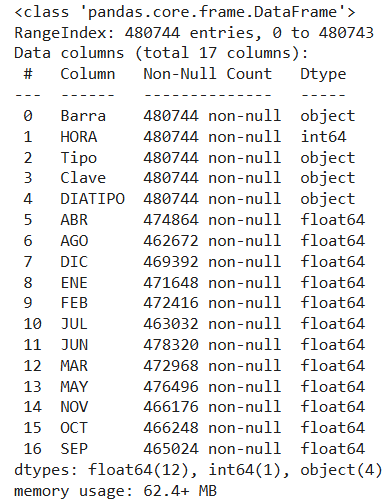



*   Para cada combinación clave-hora-díatipo se determina el valor promedio a partir de los datos de los meses que sí presentan información.
*   Se utiliza esta información para rellenar los valores faltantes, y se consulta el nuevo estado del dataframe:

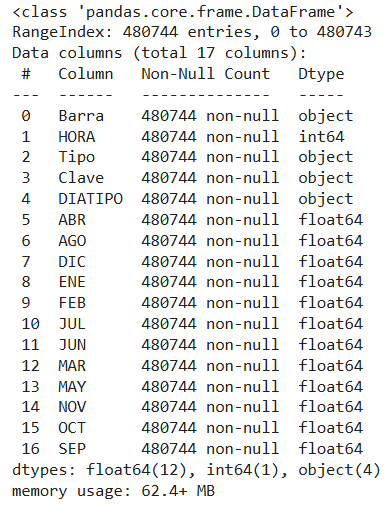



*   Se observa que ahora todos los meses tienen el número completo de datos (480744).
*   Para verificar la corrección efectuada, y entregar la tabla depurada a las siguientes etapas del proceso de cálculo, se genera el archivo Data_Claves_2024_rev.xlsx. Por ejemplo, esta es la nueva situación de la clave 3449023_PEAJE mencionada al inicio, donde se aprecia el correcto llenado con el promedio de los datos disponibles:

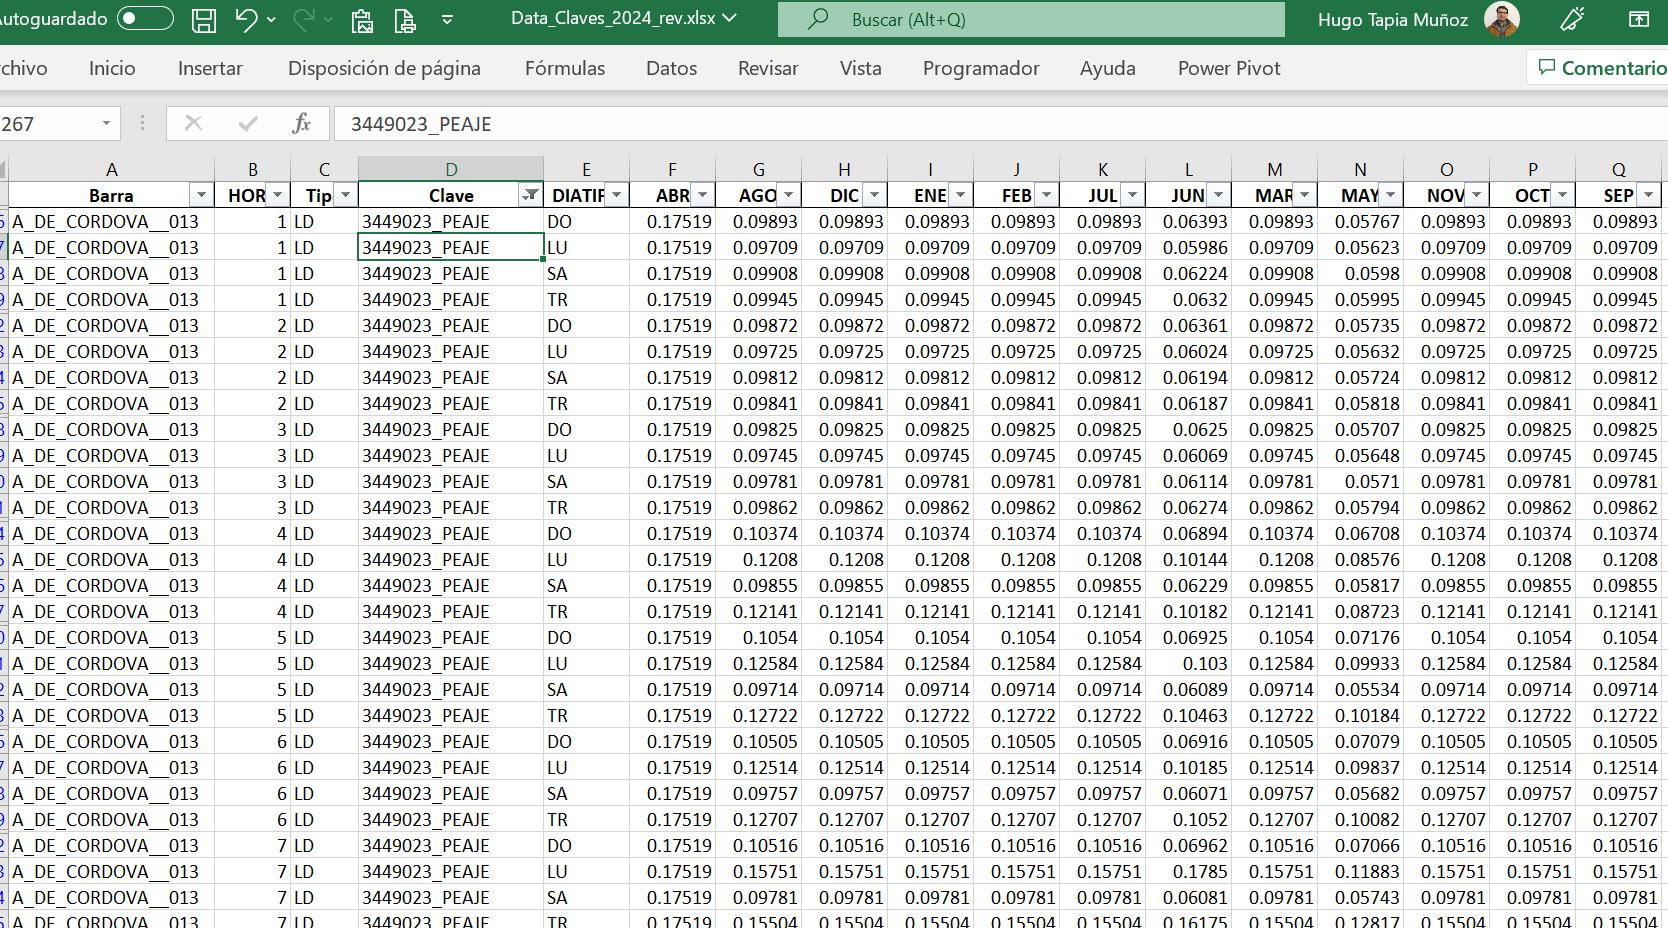




*   El tiempo de ejecución fue tan solo de 2 minutos (121.5 segundos).

**De este modo, se verifica la gran potencialidad del uso de arreglos y dataframes en la etapa de ETL (Extraer - Transformar - Cargar), necesaria para depurar y corregir información de manera previa a ser utilizada en procesos de negocio, o almacenada en datamart's que apoyen la toma de decisiones**.

# <font color='blue'>__Caso de uso : Begoña Urtubia__</font>

## ***Obtención y preparación de datos ambientales públicos de SNIFA***


El Servicio de Evaluación Ambiental (SEA) es quien se encarga de evaluar y aprobar proyectos que pueden tener afectación ambiental, así como fiscalizar el cumplimiento de los compromisos ambientales .

Cuanto un proyecto obtiene una calificación ambiental favorable por parte del SEA, se obtiene una Resolución de Calificación Ambiental (RCA).  Este documento establece las condiciones, exigencias o medidas que el titular asociado a un proyecto o actividad deberá cumplir durante su ejecución.

Dentro de las exigencias que el SEA que puede pedir esta el compromiso por parte de la empresa o institución a quien se le aprueba el proyecto de monitorear y reportar cada cierta frecuencia algunos parámetros fisicoquímicos con el fin verificar que no sobrepasen umbrales aceptables. Estos reportes son de caracter público y se pueden descargar desde la pagina web del Sistema Nacional de Información de Fiscalización Ambiental (SNIFA).

A continuación, se obtienen y preparan algunos datos ambientales de [RILES](https://snifa.sma.gob.cl/DatosAbiertos) reportados durante el año 2017 a lo largo de todo Chile.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos, leemos los archivos, y los transformamos en DataFrame
path =  '/content/drive/MyDrive/BITACORA - Grupo 3/02 OBTENCION Y PREPARACION DE DATOS/OD99_Archivos'
files = []
data = []
data_df = []
for i in range(1,13):
  files.append(f'/Emisiones2017-{i:02}_Act2024-09-01.csv')
for file in files:
  data.append(pd.read_csv(path+file))
for d in data:
  data_df.append(pd.DataFrame(d))
df = pd.concat(data_df, axis=0)

In [4]:
# Obtenemos información general del DataFrame resultante
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276412 entries, 0 to 22241
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PeriodoInforme           276412 non-null  object 
 1   RUT                      276412 non-null  object 
 2   RazonSocial              276412 non-null  object 
 3   Planta                   276412 non-null  object 
 4   PuntoDeDescarga          276412 non-null  object 
 5   CuerpoReceptor           271506 non-null  object 
 6   Norma                    276412 non-null  object 
 7   Muestra                  276412 non-null  int64  
 8   MuestraParametro_Codigo  276412 non-null  int64  
 9   Parametro                276412 non-null  object 
 10  Unidad                   276412 non-null  object 
 11  Valor reportado          276412 non-null  float64
 12  Caudal Muestra (m3/dia)  276412 non-null  float64
 13  RPM                      274709 non-null  float64
 14  Tipo de co

In [5]:
df.columns

Index(['PeriodoInforme', 'RUT', 'RazonSocial', 'Planta', 'PuntoDeDescarga',
       'CuerpoReceptor', 'Norma', 'Muestra', 'MuestraParametro_Codigo',
       'Parametro', 'Unidad', 'Valor reportado', 'Caudal Muestra (m3/dia)',
       'RPM', 'Tipo de control', 'Laboratorio', 'UnidadFiscalizable',
       'RegionId', 'RegionNombre', 'ComunaId', 'ComunaNombre',
       'NombreCategoria', 'NombreSubCategoria', 'Latitud', 'Longitud',
       'CodigoRETC', 'Tabla', 'Direccion', 'NumeroRCA', 'FechaRCA'],
      dtype='object')

In [6]:
df.sample(3)

,PeriodoInforme,RUT,RazonSocial,Planta,PuntoDeDescarga,CuerpoReceptor,Norma,Muestra,MuestraParametro_Codigo,Parametro,...,ComunaNombre,NombreCategoria,NombreSubCategoria,Latitud,Longitud,CodigoRETC,Tabla,Direccion,NumeroRCA,FechaRCA
9231,2017-03-01,79784980-4,CERMAQ CHILE S.A.,PISCICULTURA CONFLUENCIA,PUNTO 1 ESTERO CONFLUENCIA,ESTERO CONFLUENCIA,DS 90,798410,798410,Temperatura,...,Cunco,Pesca y Acuicultura,Centro de cultivo de peces,-38.859732,-71.876180,5402116,Tabla 1,"CAMINO CUNCO, MELIPEUCO S/N, Cunco",NaN,NaN
175,2017-03-01,3189619-3,RIBBA,PISCICULTURA LONCOTRARO,PUNTO 1 ESTERO LONCOTRARO VILLARRICA,ESTERO LONCOTRARO,DS 90,784531,784531,pH,...,Villarrica,Pesca y Acuicultura,Centro de cultivo de peces,-39.308049,-72.077654,322380,Tabla 3,"RUTA 199 SN, Villarrica",NaN,NaN
12020,2017-02-01,87756500-9,ENAP REFINERIAS S A,REFINERIA BIO BIO,PUNTO 1 RIO BIO BIO,RIO BIO BIO,DS 90,31639,736553,Cianuro,...,Hualpén,Instalación fabril,Planta de Refinería,-36.775327,-73.116842,78632,Tabla 2,"CAMINO A LENGA 2001, Hualpen",NaN,NaN


Con esta revisión superficial de los datos se observan los siguientes atributos y sus caracteristicas:

* Se observa que el campo `'PeriodoInforme'` se refiere a fechas, específicamente meses y años en los que se reportan los datos.

* Por otro lado, los campos `'RUT'`, `'RazonSocial'` sirven para identificar al emisor de RILES como persona jurídica.

* El campo `'Planta'` identifica el nombre de la planta en donde se efectua la emisión de RILES, es posible que una Razón Social tenga más de una planta.

* El campo `'Puntos de Descarga'` hace referencia al lugar geográfico en el que se efectua la descarga de RILES, mientras que `'CuerpoReceptor'` hace referencia a qué cuerpo de agua o sector recibe los RILES (bahía, río, canal, etc).

* El campo `'Norma'` indica bajo qué norma se estan comparando los parámetros reportados, si [DS 90](https://www.bcn.cl/leychile/navegar?idNorma=182637) o [DS 46](https://www.bcn.cl/leychile/navegar?idNorma=206883&idParte=).

* El campo `'Muestra'` es un código único para cada una de las muestras tomadas, mientras que el campo `'MuestraParametro_Codigo'` es un código único para cada parametro analizado en cada una de las muestras tomadas.

* El campo `'Parametro'` indica qué se está reportando, esto puede ser parámetros fisicoquímicos, concentraciones de lementos o compuestos químicos.

* El campo `'unidad'` hace referencia a la unidad de medida del parámetro reportado.

* El `'Valor reportado'` indica el valor del parámetro que se reporta, mientras que `'Caudal Muestra (m3/dia)'`representa el caudal de los RILES al momento de que la muestra es tomada.

* el campo `'RPM'` representa la "Pesolución del Programa de Monitoreo" y el campo `'Tipo de control'` da cuenta de su es un Autocontrol o un Control Directo.

* el campo `'Laboratorio'` informa qué laboratorio es el que hace los análisis, mientras que el campo `'UnidadFiscalizable'` indica a que institución o empresa se esta fizcalizando.

* Los parámetros `'RegionId'`,  `'RegionNombre'`,  `'ComunaId'` y `'ComunaNombre'` dan cuenta de la región adminisitrativa en el territorio chilen estan ubicadas las fuente de emisión de RILES.

* Los campos `'NombreCategoria'` y `'NombreSubCategoria'` indican a que rubro pertenece la fuente de emisión de RILES.

* Los campos `'Latitud'`  y `'Longitud'` son las coordenadas geográficas en grados (°) que permiten ubicar en el espacio el punto de emisión de RILES.

* Los campos `'CodigoRETC'` es el código de Registro de Emisiones y Transferencias de Contaminantes (RETC)

* Se desconoce a que hace referencia el campo  `'Tabla'`.

* El campo   `'Direccion'` hace referencia a la dirección donde se encuentra ubicada la fuente de emisión de RILES.

* Los campos  `'NumeroRCA'` y  `'FechaRCA'` indican a que Resolución de Calificación Ambiental está asociado el reporte ambiental y la fecha en la que esta se generó.

Vamos a eliminar del análisis las columnas que no nos interesan, y a convertir la columna `'PeriodoInforme'` en tipo `datetime`

In [7]:
df_select = df.drop(columns=[ 'Norma',
                              'RPM',
                              'Tipo de control',
                              'Laboratorio',
                              'UnidadFiscalizable',
                              'CodigoRETC',
                              'Tabla',
                              'Direccion',
                              'NumeroRCA',
                              'FechaRCA',
                              'Planta',
                              'PuntoDeDescarga',
                              'RazonSocial',
                              'CuerpoReceptor'])

In [8]:
df_select['PeriodoInforme'] = pd.to_datetime(df['PeriodoInforme'])

In [9]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276412 entries, 0 to 22241
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   PeriodoInforme           276412 non-null  datetime64[ns]
 1   RUT                      276412 non-null  object        
 2   Muestra                  276412 non-null  int64         
 3   MuestraParametro_Codigo  276412 non-null  int64         
 4   Parametro                276412 non-null  object        
 5   Unidad                   276412 non-null  object        
 6   Valor reportado          276412 non-null  float64       
 7   Caudal Muestra (m3/dia)  276412 non-null  float64       
 8   RegionId                 272690 non-null  float64       
 9   RegionNombre             276412 non-null  object        
 10  ComunaId                 272690 non-null  float64       
 11  ComunaNombre             276412 non-null  object        
 12  NombreCategoria       

In [10]:
df_select.groupby(by= ['RegionNombre',
                       'NombreCategoria',
                       ]).count()

PeriodoInforme   RUT  Muestra  \
RegionNombre         NombreCategoria                                        
Región Metropolitana Agroindustrias                   4619  4619     4619   
                     Energía                          2856  2856     2856   
                     Equipamiento                      341   341      341   
                     Forestal                          280   280      280   
                     Instalación fabril               6987  6987     6987   
...                                                    ...   ...      ...   
Región del Maule     Instalación fabril               2756  2756     2756   
                     Pesca y Acuicultura               580   580      580   
                     Saneamiento Ambiental            1302  1302     1302   
                     Sin Información                   503   503      503   
Sin Información      Sin Información                  3722  3722     3722   

                                            MuestraParametro_Codigo  \
RegionNombre         NombreCategoria                                  
Región Metropolitana Agroindustrias                            4619   
                     Energía                                   2856   
                     Equipamiento                               341   
                     Forestal                                   280   
                     Instalación fabril                        6987   
...                                                             ...   
Región del Maule     Instalación fabril                        2756   
                     Pesca y Acuicultura                        580   
                     Saneamiento Ambiental                     1302   
                     Sin Información                            503   
Sin Información      Sin Información                           3722   

                                            Parametro  Unidad  \
RegionNombre         NombreCategoria                            
Región Metropolitana Agroindustrias              4619    4619   
                     Energía                     2856    2856   
                     Equipamiento                 341     341   
                     Forestal                     280     280   
                     Instalación fabril          6987    6987   
...                                               ...     ...   
Región del Maule     Instalación fabril          2756    2756   
                     Pesca y Acuicultura          580     580   
                     Saneamiento Ambiental       1302    1302   
                     Sin Información              503     503   
Sin Información      Sin Información             3722    3722   

                                            Valor reportado  \
RegionNombre         NombreCategoria                          
Región Metropolitana Agroindustrias                    4619   
                     Energía                           2856   
                     Equipamiento                       341   
                     Forestal                           280   
                     Instalación fabril                6987   
...                                                     ...   
Región del Maule     Instalación fabril                2756   
                     Pesca y Acuicultura                580   
                     Saneamiento Ambiental             1302   
                     Sin Información                    503   
Sin Información      Sin Información                   3722   

                                            Caudal Muestra (m3/dia)  RegionId  \
RegionNombre         NombreCategoria                                            
Región Metropolitana Agroindustrias                            4619      4619   
                     Energía                                   2856      2856   
                     Equipamiento                               341       341   
                     Forestal                  

In [11]:
# Observamos todas las categorias de regiones y comunas
print(df_select['RegionNombre'].unique())
print()
print(df_select['ComunaNombre'].unique())
print()

['Región de la Araucanía' 'Región de Ñuble' 'Región de los Lagos'
 'Región de Los Ríos' 'Región de Antofagasta' 'Región Metropolitana'
 "Región del Libertador General Bernardo O'Higgins" 'Región de Valparaíso'
 'Región de Atacama' 'Región de Magallanes y la Antártica Chilena'
 'Región del Biobío' 'Región de Aysén del General Carlos Ibáñez del Campo'
 'Región de Arica y Parinacota' 'Sin Información' 'Región del Maule'
 'Región de Coquimbo' 'Región de Tarapacá']

['Villarrica' 'San Carlos' 'Puerto Octay' 'Panguipulli' 'Curaco de Vélez'
 'Puerto Montt' 'Antofagasta' 'Talagante' 'Machalí' 'Los Andes'
 'Diego de Almagro' 'Puchuncaví' 'Valdivia' 'Mejillones' 'Porvenir'
 'Osorno' 'Coinco' 'Chillán' 'Río Bueno' 'Futrono' 'Punta Arenas' 'Ancud'
 'San Antonio' 'Coronel' 'Coyhaique' 'Arica' 'Cabrero' 'Melipeuco' 'Tomé'
 'Los Ángeles' 'Calbuco' 'Cochamó' 'Puerto Varas' 'Cunco' 'Vilcún' 'Buin'
 'Isla de Maipo' 'Santiago' 'Sin Información' 'Aysén' 'Los Lagos'
 'La Unión' 'Pucón' 'Concón' 'Quellón' '

In [12]:
# Y también observamos todas los tipos de Categorias y Subcategorias (el rubro).
print(df_select['NombreCategoria'].unique())
print()
print(df_select['NombreSubCategoria'].unique())

['Pesca y Acuicultura' 'Agroindustrias' 'Saneamiento Ambiental'
 'Instalación fabril' 'Minería' 'Vivienda e Inmobiliarios'
 'Sin Información' 'Equipamiento' 'Energía' 'Forestal'
 'Infraestructura Portuaria' 'Otras categorías'
 'Transportes y almacenajes']

['Centro de cultivo de peces' 'Matadero / frigorífico'
 'Elaboración de productos lácteos' 'Centro de redes'
 'Elaboración y procesado de recursos hidrobiológicos'
 'Planta de Tratamiento de Aguas Servidas' 'Otras' 'Minera metálica'
 'Fundición' 'Conjunto habitacional' 'Sin Información'
 'Establecimiento educacional' 'Planta de tratamiento de RILes'
 'Central termoeléctrica'
 'Plantas procesadoras de alimentos (no agrícola)' 'Metalurgia'
 'Planta procesadora de productos químicos'
 'Centro de engorda de salmones'
 'Planta procesadora de productos agrícolas'
 'Producción agrícola / cultivos' 'Central hidroeléctrica de pasada'
 'Planta de curtiembre' 'Otros equipamientos' 'Planta desaladora'
 'Planta de Polímeros sintéticos (Producción

Seleccionamos aquellas emisiones producidas en la región de Atacama, comuna de Diego de Almagro de categoría minería, y el parámetro pH.

In [13]:
df_III_min_pH = df_select.loc[(df_select['RegionNombre']=='Región de Atacama')
& (df_select['ComunaNombre']=='Diego de Almagro')
& (df_select['NombreCategoria']=='Minería')
& (df_select['Parametro']=='pH')]


df_III_min_pH

,PeriodoInforme,RUT,Muestra,MuestraParametro_Codigo,Parametro,Unidad,Valor reportado,Caudal Muestra (m3/dia),RegionId,RegionNombre,ComunaId,ComunaNombre,NombreCategoria,NombreSubCategoria,Latitud,Longitud
1984,2017-01-01,61704000-K,694239,694239,pH,Unidad,7.93,154.05,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2001,2017-01-01,61704000-K,694277,694277,pH,Unidad,8.41,206.30,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
1987,2017-02-01,61704000-K,733661,733661,pH,Unidad,8.30,134.96,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2004,2017-02-01,61704000-K,733678,733678,pH,Unidad,7.58,143.54,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2035,2017-04-01,61704000-K,820962,820962,pH,Unidad,7.70,234.50,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2052,2017-04-01,61704000-K,821113,821113,pH,Unidad,7.50,1724.60,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2075,2017-05-01,61704000-K,866299,866299,pH,Unidad,7.10,1351.40,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
2092,2017-05-01,61704000-K,866326,866326,pH,Unidad,6.80,728.70,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
1817,2017-06-01,61704000-K,889634,889634,pH,Unidad,7.44,1347.61,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401
1836,2017-06-01,61704000-K,891136,891136,pH,Unidad,7.77,1724.62,4.0,Región de Atacama,80.0,Diego de Almagro,Minería,Minera metálica,-26.335903,-69.664401


Observamos que el RUT es el mismo para todas las entrada, por lo que verificamos que se trata de un solo emisor en minería en esta comuna

In [14]:
df_III_min_pH['RUT'].unique()

array([' 61704000-K'], dtype=object)

In [15]:
df.loc[(df_select['RUT']==' 61704000-K')&(df_select['ComunaNombre']=='Diego de Almagro'), 'Planta'].unique()

array(['DIVISIÓN SALVADOR CENTRAL'], dtype=object)

Notamos que el emisor es el CODELCO, División Salvador Central.

Tomamos los valores de pH de 2017 y lo graficamos en el tiempo.

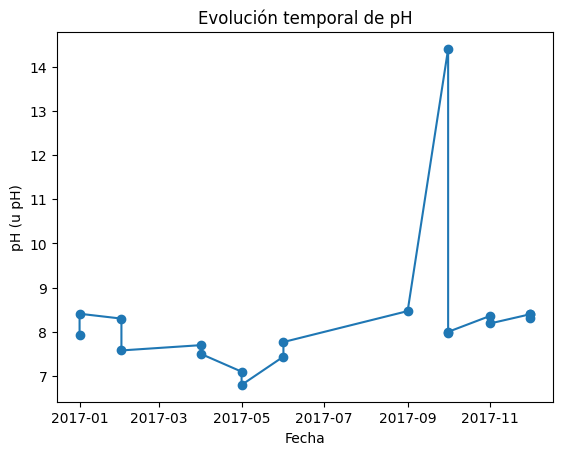

In [16]:
x=df_III_min_pH['PeriodoInforme'].values
y=df_III_min_pH['Valor reportado'].values

fig = plt.Figure()
ax = fig.add_subplot(111)

# Ocupamos el Artista ax, para dibujar los pares x,y
ax.plot(x,y, marker='o')

# Añadimos el titulo al eje ax
ax.set_title('Evolución temporal de pH')
ax.set_xlabel("Fecha")
ax.set_ylabel("pH (u pH)")

# Mostramos la figura
plt.show()
fig

Este es un pequeño ejemplo de lo que se puede hacer con datos publicos de la SNIFA